산업용 전기 시간대별 그래프와 일자별 평균 전력소요량 그래프

In [1]:
# 필요 라이브러리 로드
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sqlite3,os
import pandas as pd
import platform
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
if platform.system() == 'Windows':
# 윈도우인 경우 맑은 고딕 폰트 이용
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf"
                                           ).get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')

#그래프에서 마이너스 기호가 표시되게 하는 설정입니다.
plt.rcParams['axes.unicode_minus'] == False

False

In [2]:
df_0 = pd.read_csv('data\\2020_업종별전력_시간.csv', encoding='cp949')
df_1 = pd.read_csv('data\\2021_업종별전력_시간.csv', encoding='cp949')
df = pd.concat([df_0,df_1]).reset_index(drop=True)

# df = pd.merge(df_0,df_1, on=['월별', '시간별', '항목'])
# # df_0.head(2)
# # df_1.head(2)
# df.head(2)

df_0.head(2)

,월별,시간별,항목,2020 년
0,1월,1시,농업,1070
1,1월,1시,임업,986


In [3]:
# df =df.groupby(['시간별'], as_index=False)['2020 년','2021 년'].sum()
# df.head(24)
# df.to_csv('업종별.csv', encoding='cp949')
# df_t = df.T
# # df_t.head(3)
# df.sort_values('시간별')




In [20]:
# 업종별 전력 수요량을 시간별로 정리한 df, 이걸 시간순으로 정렬함

df = pd.read_csv('data2\업종별.csv', encoding='cp949')
df.head(2)
df.drop(columns=['Unnamed: 0'], inplace=True) 
df.head(2)
df = df.sort_values('시간별')

,Unnamed: 0,시간별,2020 년,2021 년
0,0,10,1126406,1148580
1,1,11,1152972,1174771


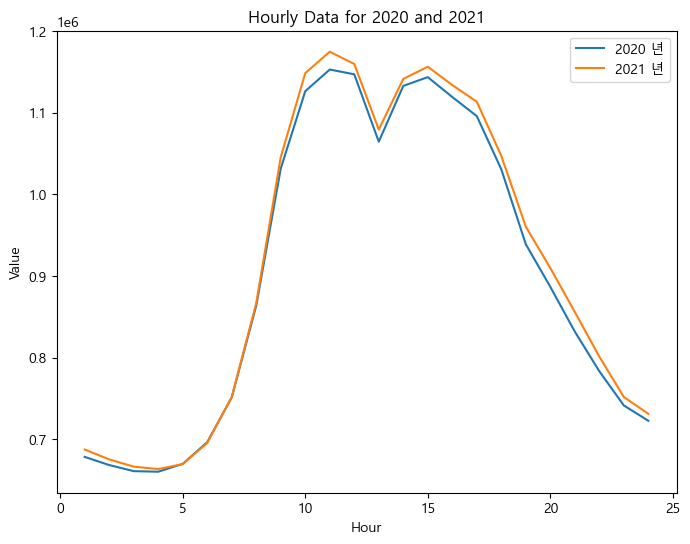

In [6]:
# 업종별 전력 수요량을 시간별로 그래프로 그림, 20년도 21년도 그래프


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df.set_index('시간별', inplace=True)

# Create a line plot with two lines representing the data for 2020 and 2021
df.plot(kind='line', figsize=(8, 6))

# Set the title and axis labels
plt.title('Hourly Data for 2020 and 2021')
plt.xlabel('Hour')
plt.ylabel('Value')

# Show the plot
plt.show()

In [8]:
# 시간별 전력 수요량 데이터

df_power = pd.read_csv('data2\시간별_전력데이터.csv', encoding= 'cp949')
df_power.fillna(value = 0)

,Unnamed: 0,공급능력(MW),현재수요(MW),공급예비력(MW),공급예비율(퍼센트),datetime
0,0,64355.000000,50990.289167,13364.711667,26.224017,2012-06-01 00:00:00
1,1,64355.000000,50064.355000,14290.646667,28.545997,2012-06-01 01:00:00
2,2,64559.166667,49986.542500,14572.623333,29.156328,2012-06-01 02:00:00
3,3,64845.000000,50093.080833,14751.918333,29.453125,2012-06-01 03:00:00
4,4,64845.000000,50456.725833,14388.274167,28.518804,2012-06-01 04:00:00
...,...,...,...,...,...,...
86333,86333,83646.116667,69966.391667,13679.708333,19.555125,2022-04-07 19:00:00
86334,86334,83715.825000,68310.458333,15405.366667,22.558508,2022-04-07 20:00:00
86335,86335,83529.483333,66472.925000,17056.575000,25.663192,2022-04-07 21:00:00
86336,86336,83061.116667,65215.066667,17846.050000,27.372808,2022-04-07 22:00:00


In [9]:
# 필요없는 칼럼제거

df_power.drop(columns = ['Unnamed: 0'], inplace =True)

In [12]:
# datetime을 년,월,일 칼럼으로 분리

df_power['datetime'] = pd.to_datetime(df_power['datetime'])
df_power['year'] = df_power['datetime'].dt.year
df_power['month'] = df_power['datetime'].dt.month
df_power['day'] = df_power['datetime'].dt.day

In [13]:
# 같은 년도와 일자로 데이터를 합침
# 즉 12년도 1일~31일 까지의 평균치, 13년도 1일~31일 까지의 평균치 .... ~~ 22년도 1일~31일 까지의 평균치를 엑셀파일로

df =df_power.groupby(['year','day'], as_index=False)['현재수요(MW)','공급능력(MW)','공급예비율(퍼센트)'].mean()
df.to_csv('data2\수요_날짜별.csv', encoding='cp949')
df

C:\Users\admin\AppData\Local\Temp\ipykernel_19204\2686637561.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df =df_power.groupby(['year','day'], as_index=False)['현재수요(MW)','공급능력(MW)','공급예비율(퍼센트)'].mean()


,year,day,현재수요(MW),공급능력(MW),공급예비율(퍼센트)
0,2012,1,53578.834822,70670.173701,34.505670
1,2012,2,53383.999191,70219.130952,33.282129
2,2012,3,55348.587056,70293.958829,28.664493
3,2012,4,57262.992564,71362.970238,26.004690
4,2012,5,58787.195938,72162.568452,23.808201
...,...,...,...,...,...
336,2022,27,62274.419792,93134.562963,51.300052
337,2022,28,67845.535417,94034.239699,39.053094
338,2022,29,64143.235590,90750.913542,41.858268
339,2022,30,63118.548438,88180.984201,40.901016


In [14]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.rcParams['figure.figsize'] = [10, 8]

# for i, year in enumerate(df['year'].unique()):
#     year_data = df[df['year'] == year]
#     plt.plot(year_data['day'], year_data['현재수요(MW)'], label=str(year))

# # Set the x-axis and y-axis labels
# plt.xlabel('Month')
# plt.ylabel('Power Demand (MW)')

# # Set the x-axis tick labels (months)

# plt.xticks(np.arange(1, 31), df['day'])

# # Add a legend to the plot
# plt.legend()

# # Set the title of the plot
# plt.title('wind power(m/s) by Month and Year')

# # Show the plot
# plt.show()

In [15]:
# 일자로만 데이터를 합침

df =df_power.groupby(['day'], as_index=False)['현재수요(MW)','공급능력(MW)','공급예비율(퍼센트)'].mean()
df

C:\Users\admin\AppData\Local\Temp\ipykernel_19204\150357093.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df =df_power.groupby(['day'], as_index=False)['현재수요(MW)','공급능력(MW)','공급예비율(퍼센트)'].mean()


,day,현재수요(MW),공급능력(MW),공급예비율(퍼센트)
0,1,59539.497675,84777.725370,43.798290
1,2,60675.492391,84901.242269,41.403804
2,3,61110.961755,84560.257748,39.739028
3,4,61609.465527,84643.887740,38.885208
4,5,61571.954073,84707.029093,39.192851
5,6,61590.057242,84786.342788,39.068393
6,7,62175.143755,84891.778174,38.046653
7,8,62100.561198,84858.503393,38.196006
8,9,61960.242681,84674.156117,38.067869
9,10,62444.961444,84723.692144,37.077534


In [16]:
# 표에서 사용하지않을 칼럼삭제

df.drop(columns = ['공급능력(MW)', '공급예비율(퍼센트)'], inplace =True)

In [17]:
# df

,day,현재수요(MW)
0,1,59539.497675
1,2,60675.492391
2,3,61110.961755
3,4,61609.465527
4,5,61571.954073
5,6,61590.057242
6,7,62175.143755
7,8,62100.561198
8,9,61960.242681
9,10,62444.961444


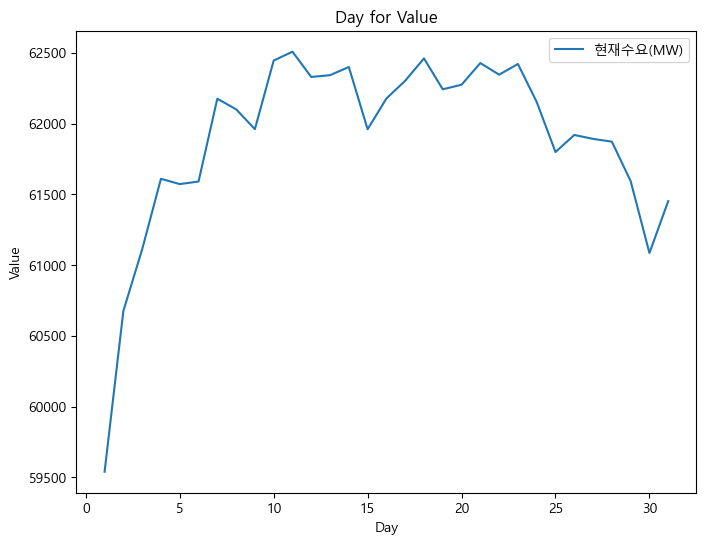

In [18]:
# 12년도부터 22년도까지의 1일~31일 날짜별 전력 수요량 평균치 그래프
# 월초와 월말의 수요량이 적은것을 확인할 수 있음

df.set_index('day', inplace=True)

# Create a line plot with two lines representing the data for 2020 and 2021
df.plot(kind='line', figsize=(8, 6))

# Set the title and axis labels
plt.title('Day for Value')
plt.xlabel('Day')
plt.ylabel('Value')

# Show the plot
plt.show()